# Haberman's Cancer Survival - Exploratory Data Analysis

> The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer

## Aim

<i>To understand the cancer patient's survival rate by analysing various factors like age, positive nodes detected and year of operation </i>

#### Inferences would be :
    
1. What are the major factors influencing the cancer patient's survival rate ?

2. Predicting the cancer patient's survival rate after analysing the patient's information

3. Other inferences

#### Independent Variables


<b> age </b>:  <i>Age of patient at time of operation</i>

<b> year </b>:  <i>Patient's year of operation (year - 1900, numerical)</i>

<b> nodes </b>: <i>Number of positive axillary nodes detected</i>

#### Target Variable

<b> status </b> : 1 = the patient survived 5 years or longer; 2 = the patient died within 5 year

In [82]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings; warnings.simplefilter('ignore')

In [83]:
#Load haberman.csv into a pandas dataFrame.
data = pd.read_csv("haberman.csv")

## statistical data exploration

In [84]:
data.shape #number of rows and columns

(306, 4)

In [85]:
data.columns #print all the column names

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [86]:
data.dtypes #printing data types of all columns

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [87]:
data.head()  #printing few rows of data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [88]:
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

There are no null values in data

In [89]:
data.nunique() # check for unique values of all columns

age       49
year      12
nodes     31
status     2
dtype: int64

In [90]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


By observing the mean, min and max - we can conclude that the data has no outliers

In [91]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Though the survivors are more, we have good number of observations for non-survivors as well.

## Visual data exploration

#### Univariate Analysis

##### PDF

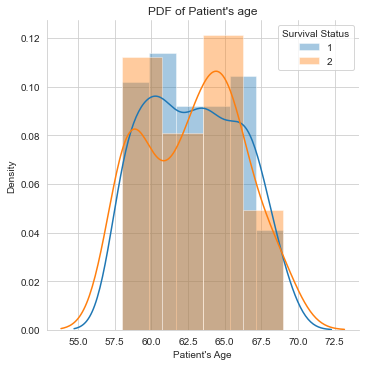

In [92]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year");

# Plot formatting
plt.legend(prop={'size': 10}, title = 'Survival Status')
plt.title("PDF of Patient's age")
plt.xlabel("Patient's Age")
plt.ylabel("Density")
plt.show();

##### Observation:

There is an overlapping between curves, hence it is difficult to make any observation.

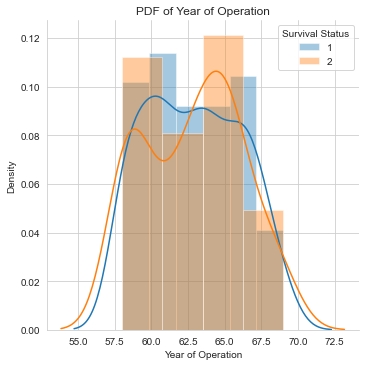

In [93]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year");
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Survival Status')
plt.title("PDF of Year of Operation")
plt.xlabel("Year of Operation")
plt.ylabel("Density")
plt.show();

##### Observation:

There is an overlapping between curves, hence it is difficult to make any observation.

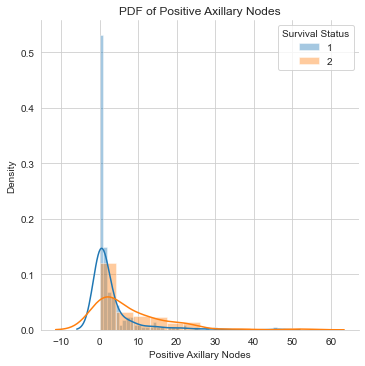

In [94]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes");
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Survival Status')
plt.title("PDF of Positive Axillary Nodes")
plt.xlabel("Positive Axillary Nodes")
plt.ylabel("Density")
plt.show();

##### Observation:

We see that the survival rate increases when number of positive nodes in the body increases.

In [95]:
data_more_than_5 = data.loc[data["status"]==1]
data_less_than_5= data.loc[data["status"]==2]

#### CDF

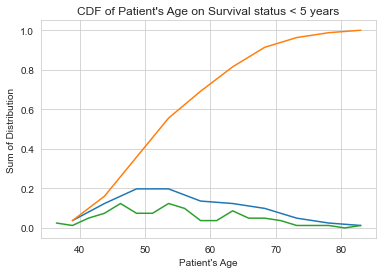

In [96]:
#Plot CDF of age on patients who died in less than 5 years

counts, bin_edges = np.histogram(data_less_than_5['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_less_than_5['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

# Plot formatting
plt.title("CDF of Patient's Age on Survival status < 5 years")
plt.xlabel("Patient's Age")
plt.ylabel("Sum of Distribution")
plt.show();


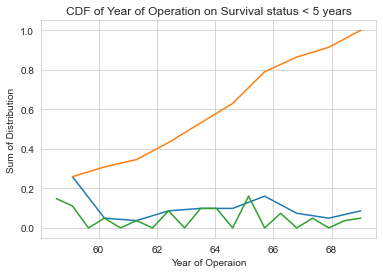

In [97]:
#Plot CDF of year of operation on patients who died in less than 5 years

counts, bin_edges = np.histogram(data_less_than_5['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_less_than_5['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

# Plot formatting
plt.title("CDF of Year of Operation on Survival status < 5 years")
plt.xlabel("Year of Operaion")
plt.ylabel("Sum of Distribution")
plt.show();


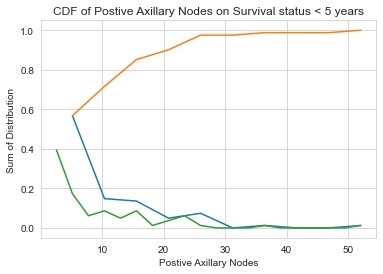

In [98]:
#Plot CDF of year of operation on patients who died in less than 5 years

counts, bin_edges = np.histogram(data_less_than_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_less_than_5['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

# Plot formatting
plt.title("CDF of Postive Axillary Nodes on Survival status < 5 years")
plt.xlabel("Postive Axillary Nodes")
plt.ylabel("Sum of Distribution")
plt.show();


##### Observation:

It is difficult to get any insoght from all cdf's as well

#### Boxplots, Violin Plots

Text(0.5, 1.0, 'ViolinPlot: status * nodes')

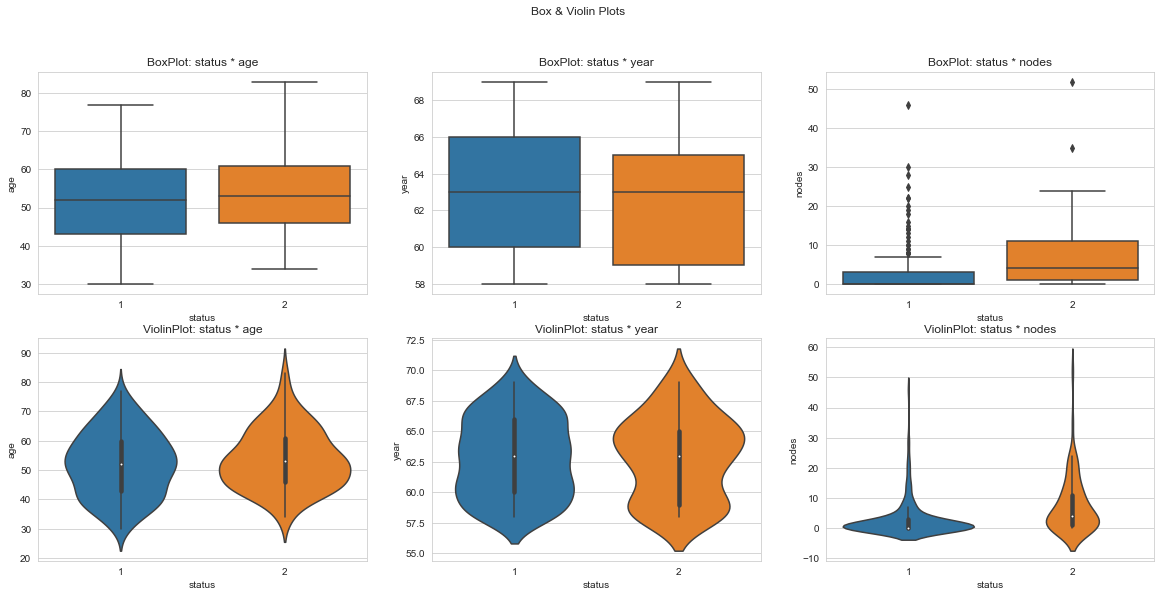

In [99]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

fig.suptitle('Box & Violin Plots')

sns.boxplot(ax=axes[0,0], data=data, x='status', y='age')
axes[0,0].set_title('BoxPlot: status * age')
sns.boxplot(ax=axes[0,1], data=data, x='status', y='year')
axes[0,1].set_title('BoxPlot: status * year')
sns.boxplot(ax=axes[0,2], data=data, x='status', y='nodes')
axes[0,2].set_title('BoxPlot: status * nodes')
sns.violinplot(ax=axes[1,0],data=data, x="status", y="age", size=8)
axes[1,0].set_title('ViolinPlot: status * age')
sns.violinplot(ax=axes[1,1],data=data, x="status", y="year", size=8)
axes[1,1].set_title('ViolinPlot: status * year')
sns.violinplot(ax=axes[1,2],data=data, x="status", y="nodes", size=8)
axes[1,2].set_title('ViolinPlot: status * nodes')

##### Observation:

Univariate analysis is not giving much insights about data

### bi-variate analysis

#### 2-D scatter plots

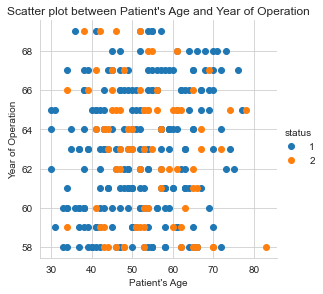

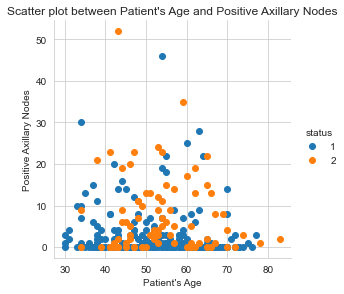

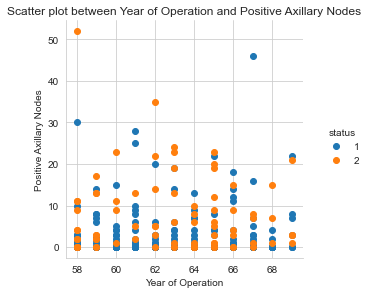

In [100]:
sns.set_style("whitegrid")

sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();


plt.title("Scatter plot between Patient's Age and Year of Operation")
plt.xlabel("Patient's Age")
plt.ylabel("Year of Operation")
plt.show();

sns.set_style("whitegrid")

sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot between Patient's Age and Positive Axillary Nodes")
plt.xlabel("Patient's Age")
plt.ylabel("Positive Axillary Nodes")
plt.show();

sns.set_style("whitegrid")

sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("Scatter plot between Year of Operation and Positive Axillary Nodes")
plt.xlabel("Year of Operation")
plt.ylabel("Positive Axillary Nodes")
plt.show();

##### Observation:
Scatter plots are giving any information.

#### Pair-Plot

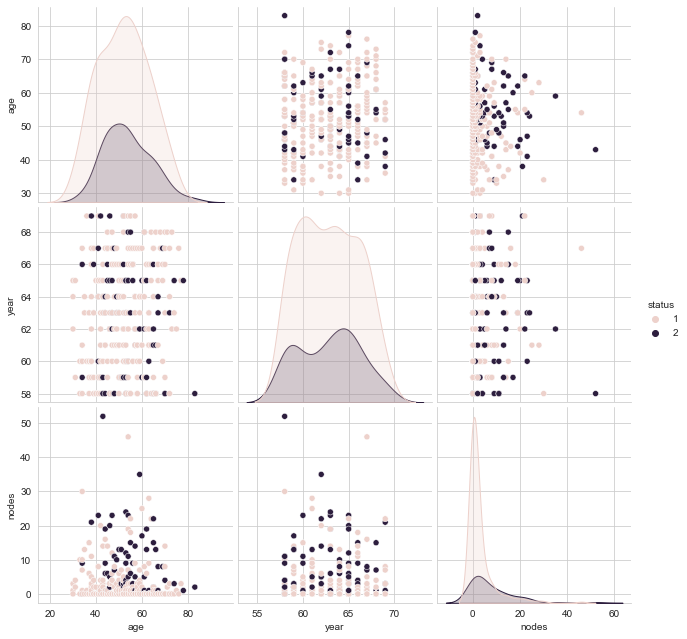

In [101]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="status",size=3)
plt.show()

### Histograms

Creating histograms to unerstand if we can make some intervals on variables.

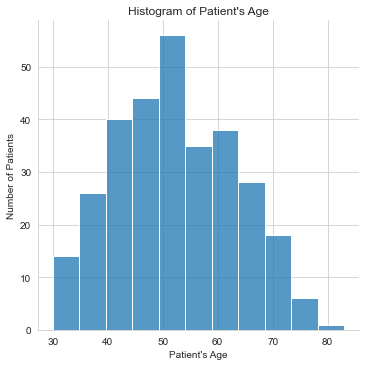

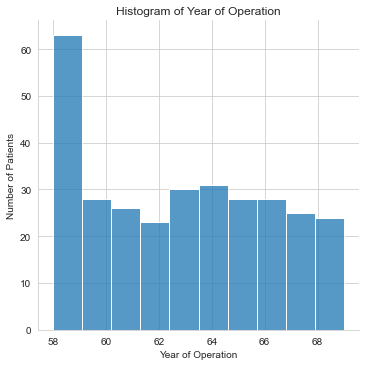

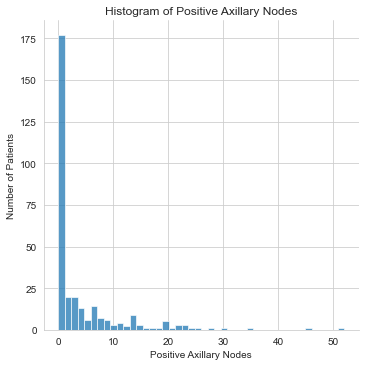

In [102]:
sns.FacetGrid(data, height=5).map(sns.histplot, "age")
plt.title("Histogram of Patient's Age")
plt.xlabel("Patient's Age")
plt.ylabel("Number of Patients")
plt.show();

sns.FacetGrid(data, height=5).map(sns.histplot, "year")
plt.title("Histogram of Year of Operation")
plt.xlabel("Year of Operation")
plt.ylabel("Number of Patients")
plt.show();

sns.FacetGrid(data, height=5).map(sns.histplot, "nodes")
plt.title("Histogram of Positive Axillary Nodes")
plt.xlabel("Positive Axillary Nodes")
plt.ylabel("Number of Patients")
plt.show();


### Feature Creation

Let us create some new features (age, year, nodes) in intervals from the existing variables so that we can gain more insights from the data.

In [103]:
def ages(x):
    if x in range(30,40):
        return '30-40'
    elif x in range(40,50):
        return '40-50'
    elif x in range(50,60):
        return '50-60'
    elif x in range(60,70):
        return '60-70'
    elif x in range(70,80):
        return '70-80'
    else:
        return '>80'

In [104]:
data['age_intervals']=data['age'].apply(ages)

In [105]:
def years(x):
    if x in range(58,60):
        return '58-60'
    elif x in range(60,62):
        return '60-62'
    elif x in range(62,64):
        return '62-64'
    elif x in range(64,66):
        return '64-66'
    elif x in range(66,68):
        return '66-68'
    else:
        return '>68'

In [106]:
data['year_intervals']=data['year'].apply(years)

In [107]:
def nodess(x):
    if x in range(0,1):
        return '0'
    elif x in range(1,6):
        return '1-5'
    elif x in range(6,10):
        return '6-10'
    elif x in range(10,15):
        return '10-15'
    elif x in range(16,20):
        return '16-20'
    elif x in range(21,25):
        return '21-25'
    else:
        return '>25'

In [108]:
data['nodes_intervals']=data['nodes'].apply(nodess)

In [109]:
def statuses(x):
    if x in range(1,2):
        return 'survived_more_than_5_years'
    else:
        return 'survived_less_than_5_years'

In [110]:
data['status_patient']=data['status'].apply(statuses)

In [111]:
data.head(5)

,age,year,nodes,status,age_intervals,year_intervals,nodes_intervals,status_patient
0,30,64,1,1,30-40,64-66,1-5,survived_more_than_5_years
1,30,62,3,1,30-40,62-64,1-5,survived_more_than_5_years
2,30,65,0,1,30-40,64-66,0,survived_more_than_5_years
3,31,59,2,1,30-40,58-60,1-5,survived_more_than_5_years
4,31,65,4,1,30-40,64-66,1-5,survived_more_than_5_years


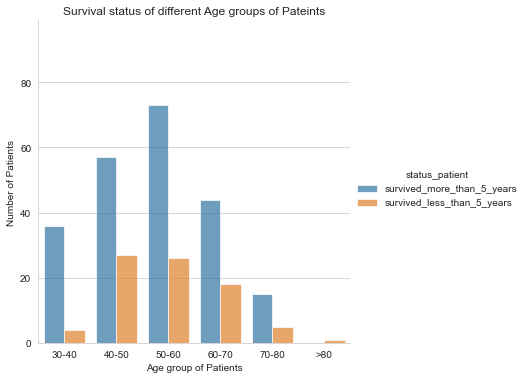

In [112]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

#df = pd.read_csv('train.csv')
sns.factorplot('age_intervals', data=data, hue='status_patient',kind='count', alpha=0.7, size=5, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = data['age_intervals'].value_counts().max() 
ax.set_ylim([0, round(y_max)])

plt.title("Survival status of different Age groups of Pateints")
plt.xlabel("Age group of Patients")
plt.ylabel("Number of Patients")

plt.show()

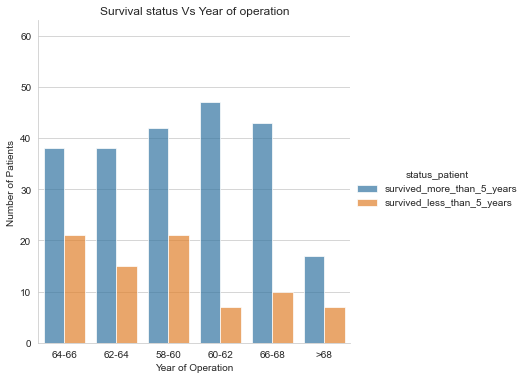

In [113]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

#df = pd.read_csv('train.csv')
sns.factorplot('year_intervals', data=data, hue='status_patient',kind='count', alpha=0.7, size=5, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = data['year_intervals'].value_counts().max() 
ax.set_ylim([0, round(y_max)])

plt.title("Survival status Vs Year of operation")
plt.xlabel("Year of Operation")
plt.ylabel("Number of Patients")

plt.show()

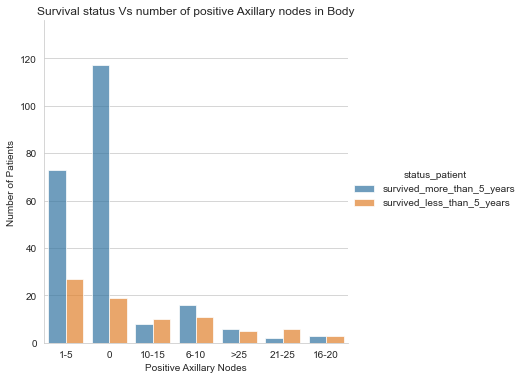

In [114]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

#df = pd.read_csv('train.csv')
sns.factorplot('nodes_intervals', data=data, hue='status_patient',kind='count', alpha=0.7, size=5, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = data['nodes_intervals'].value_counts().max() 
ax.set_ylim([0, round(y_max)])

plt.title("Survival status Vs number of positive Axillary nodes in Body")
plt.xlabel("Positive Axillary Nodes")
plt.ylabel("Number of Patients")

plt.show()

### Conclusion

1. The age group 30-40, people of age less than 40, have higher survival rate as compared to other age groups.
2. The year of operation does not impact survival rate, meaning that there is no significant improvement on cancer 
   treatment in medicine and technology.
3. The number of positive nodes in a patient's body has a huge impact on his/her survival rate, patient has less chance 
   of surviving if more than 10 positive nodes found in body.